# Práctica 2 
Aprendizaje Máquina 

**Implementa al menos tres de los ejemplos propuestos al final de la documentación.** 

### Color Quantization using K-Means

Realiza una cuantización vectorial (VQ) por píxeles de una imagen del palacio de verano (China), reduciendo el número de colores necesarios para mostrar la imagen de 96,615 colores únicos a 64, preservando al mismo tiempo la calidad de la apariencia general.

En este ejemplo, los píxeles se representan en un espacio 3D y se utilizan K-medias para encontrar 64 grupos de colores. En la literatura sobre procesamiento de imágenes, el libro de códigos obtenido de K-means (los centros del grupo) se denomina paleta de colores. Con un solo byte se pueden direccionar hasta 256 colores, mientras que una codificación RGB requiere 3 bytes por píxel. El formato de archivo GIF, por ejemplo, utiliza dicha paleta.

Modelo de ajuste en una pequeña submuestra de datos.
done in 0.014s.
Prediciendo los pixeles de cada cluster  (k-means)
Hecho en  0.003s.
Prediciendo indices de colores en imagen completa  (random)
done in 0.007s.


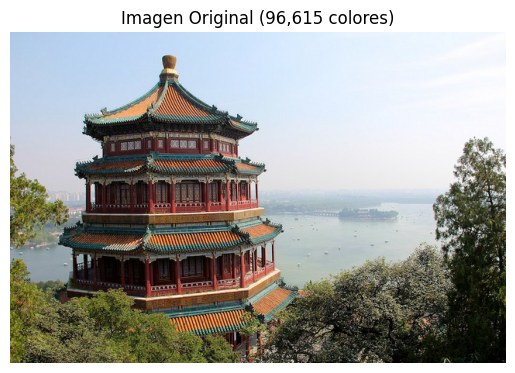

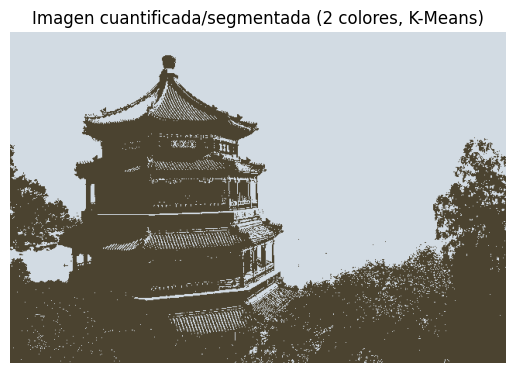

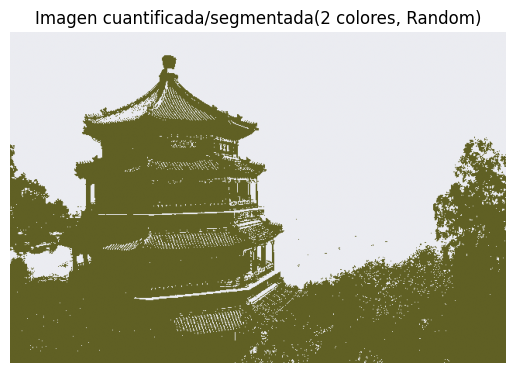

In [8]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = 2

china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# cargar imagin y convertirla a un 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Modelo de ajuste en una pequeña submuestra de datos.")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Obteniendo etiquetas para cada label
print("Prediciendo los pixeles de cada cluster  (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"Hecho en  {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Prediciendo indices de colores en imagen completa  (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recrea la imagen (compressed) del libro de códigos y la etiquetas."""
    return codebook[labels].reshape(w, h, -1)


# Desplegar resultados
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Imagen Original (96,615 colores)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Imagen cuantificada/segmentada ({n_colors} colores, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Imagen cuantificada/segmentada({n_colors} colores, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()